In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. 设置参数
# ==========================================
# Logistic 映射的关键参数 (Band Merging Point)
# 这是一个非常敏感的参数，微小的偏差都会导致轨道性质改变
U_CRITICAL = 1.543689012692076 

SAMPLE_SIZE = 5*150_000_000  # 样本数量
PRIME_LIMIT = 15_000_000 # 素数筛的上限，产生足够的素数进行对比

# ==========================================
# 2. 生成真实素数间隙 (Real Prime Gaps)
# ==========================================
def get_prime_gaps(limit):
    """使用埃拉托斯特尼筛法生成素数并计算间隙"""
    print(f"正在生成上限为 {limit} 的素数...")
    sieve = np.ones(limit // 2, dtype=bool)
    for i in range(3, int(limit**0.5) + 1, 2):
        if sieve[i // 2]:
            sieve[i*i // 2 :: i] = False
    
    primes = [1] + [2 * i + 1 for i in range(1, limit // 2) if sieve[i]]
    primes = np.array(primes)
    
    # 计算间隙: gap[i] = p[i+1] - p[i]
    gaps = np.diff(primes)
    
    # 归一化处理 (可选，为了消除素数密度 1/ln(n) 的稀疏化影响)
    # 这里我们先看原始分布的形状，通常这就足够展示“形似”
    # 如果要做严格对比，应使用 G_n = gap_n / ln(p_n)
    return gaps

# ==========================================
# 3. 生成 Logistic 映射的“虚拟间隙” (Chaos Gaps)
# ==========================================
def logistic_iteration(n_steps, u):
    x = 0.1
    gaps = []
    current_gap = 0
    for _ in range(10000): 
        x = 1 - u * x**2
        
    for _ in range(n_steps):
        x = 1 - u * x**2
        if x < 0:
            if current_gap > 0: 
                gaps.append(current_gap)
            current_gap = 1
        else:
            current_gap += 1
    return gaps

def get_chaos_gaps(n_steps, u):
    print(f"正在生成 Logistic 映射轨道 (steps={n_steps}, u={u})...")
    gaps = logistic_iteration(n_steps, u)
    return np.array(gaps)

# ==========================================
# 4. 执行与可视化
# ==========================================
def main():
    # A. 获取数据
    real_gaps = get_prime_gaps(PRIME_LIMIT)
    chaos_gaps = get_chaos_gaps(SAMPLE_SIZE * 10, U_CRITICAL) # 需要多迭代一些步数以获得足够的事件

    print(f"真实素数间隙样本数: {len(real_gaps)}")
    print(f"混沌虚拟间隙样本数: {len(chaos_gaps)}")

    # B. 绘图对比
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # 设置直方图参数
    bins = 100
    
    # 1. 真实素数间隙分布
    # 注意：素数间隙大多是偶数，且较小间隙出现频率高
    counts, bin_edges = np.histogram(real_gaps, bins=bins, range=(0, 100), density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    ax1.plot(bin_centers, counts, 'b-', marker='o', markersize=3, label='Real Prime Gaps')
    ax1.set_yscale('log') # 关键：对数坐标
    ax1.set_title(f'Distribution of Real Prime Gaps (N < {PRIME_LIMIT})')
    ax1.set_xlabel('Gap Size')
    ax1.set_ylabel('Frequency (Log Scale)')
    ax1.grid(True, which="both", ls="-", alpha=0.2)
    ax1.legend()

    # 2. Logistic 映射虚拟间隙分布
    counts_c, bin_edges_c = np.histogram(chaos_gaps, bins=bins, range=(0, 100), density=True)
    bin_centers_c = (bin_edges_c[:-1] + bin_edges_c[1:]) / 2
    
    ax2.plot(bin_centers_c, counts_c, 'r-', marker='o', markersize=3, label=f'Logistic Gaps (u={U_CRITICAL})')
    ax2.set_yscale('log') # 关键：对数坐标
    ax2.set_title('Distribution of Chaos "Prime" Gaps')
    ax2.set_xlabel('Gap Size')
    ax2.set_ylabel('Frequency (Log Scale)')
    ax2.grid(True, which="both", ls="-", alpha=0.2)
    ax2.legend()

    plt.tight_layout()
    plt.show()
    
    print("\n分析说明：")
    print("1. 请观察两张图在对数坐标下的'线性衰减'趋势（Exponential Decay）。")
    print("   如果两者都呈现近似直线的下降趋势，说明它们都遵循指数分布规律（Poisson过程特征）。")
    print("2. 注意观察波动的细节。素数间隙有著名的'奇偶振荡'（偶数间隙远多于奇数），")
    print("   而 Logistic 映射由于是离散时间系统，也可能表现出特定的周期性结构。")
    print("3. 这个简单的实验验证了论文的核心直觉：素数的生成过程在统计学上表现得")
    print("   就像一个处于混沌边缘的动力系统产生的轨道。")

正在生成上限为 15000000 的素数...
正在生成 Logistic 映射轨道 (steps=7500000000, u=1.543689012692076)...
真实素数间隙样本数: 970703
混沌虚拟间隙样本数: 1654172810


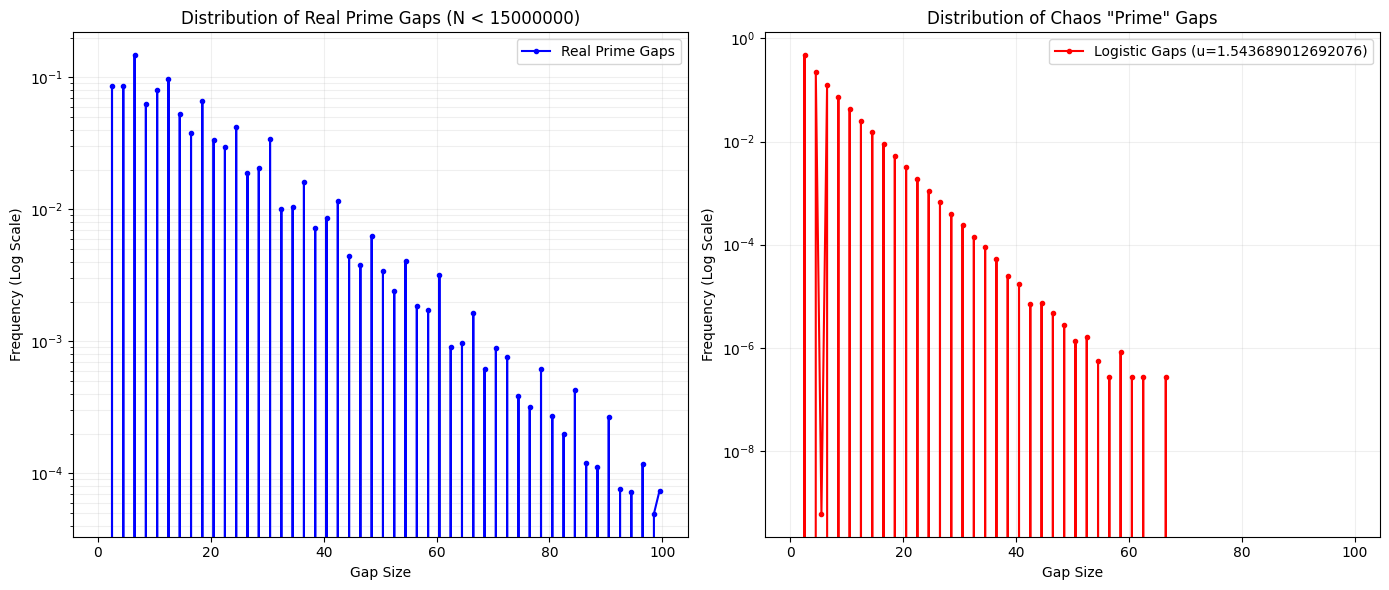


分析说明：
1. 请观察两张图在对数坐标下的'线性衰减'趋势（Exponential Decay）。
   如果两者都呈现近似直线的下降趋势，说明它们都遵循指数分布规律（Poisson过程特征）。
2. 注意观察波动的细节。素数间隙有著名的'奇偶振荡'（偶数间隙远多于奇数），
   而 Logistic 映射由于是离散时间系统，也可能表现出特定的周期性结构。
3. 这个简单的实验验证了论文的核心直觉：素数的生成过程在统计学上表现得
   就像一个处于混沌边缘的动力系统产生的轨道。


In [4]:
main()